In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def midpoint_method(fx, fy, x0, y0, dt, steps):
    x = np.zeros(steps)
    y = np.zeros(steps)
    x[0], y[0] = x0, y0
    for n in range(steps - 1):
        kx = dt * fx(x[n], y[n])
        ky = dt * fy(x[n], y[n])
        
        x_mid = x[n] + kx / 2
        y_mid = y[n] + ky / 2
        
        x[n + 1] = x[n] + dt * fx(x_mid, y_mid)
        y[n + 1] = y[n] + dt * fy(x_mid, y_mid)
    return x, y


In [4]:
def classify_matrix(A):
    det = np.linalg.det(A)
    tre = np.trace(A)
    print(f"Matrix:\n{A}")
    print(f"Trace: {tre}, Determinant: {det}")
    
    if det > 0:
        if tre > 0:
            print("Unstable Node\n")
        elif tre < 0:
            print("Stable Node\n")
        else:
            print("Center (Purely oscillatory)\n")
    if det < 0:
        print("Saddle Point\n")



In [5]:
def plot_linear_phase_portrait(A, title, xlim=(-5,5), ylim=(-5,5), num_trajectories=20):
    # Define the system functions
    def fx(x, y):
        return A[0,0]*x + A[0,1]*y
    def fy(x, y):
        return A[1,0]*x + A[1,1]*y
    
    x0_vals = np.linspace(xlim[0], xlim[1], num_trajectories)
    y0_vals = np.linspace(ylim[0], ylim[1], num_trajectories)
    
    plt.figure(figsize=(8,6))
    
    for x0 in x0_vals:
        for y0 in y0_vals:
            x, y = midpoint_method(fx, fy, x0, y0, dt=0.05, steps=100)
            plt.plot(x, y, color='green', alpha=0.3)
            
            for i in range(0, len(x)-1, 10):  
                plt.arrow(x[i], y[i], x[i+1]-x[i], y[i+1]-y[i], 
                          shape='full', lw=0, length_includes_head=True, 
                          head_width=0.1, color='red', alpha=0.7)
    
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.grid(True)
    plt.show()


Matrix A Analysis:
Matrix:
[[-2  1]
 [ 0  2]]
Trace: 0, Determinant: -4.0
Saddle Point



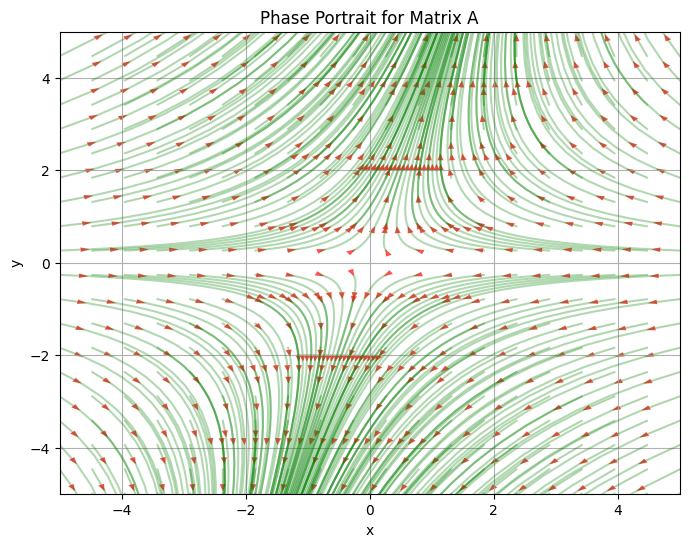

Matrix B Analysis:
Matrix:
[[ 3 -4]
 [ 2 -1]]
Trace: 2, Determinant: 5.000000000000001
Unstable Node



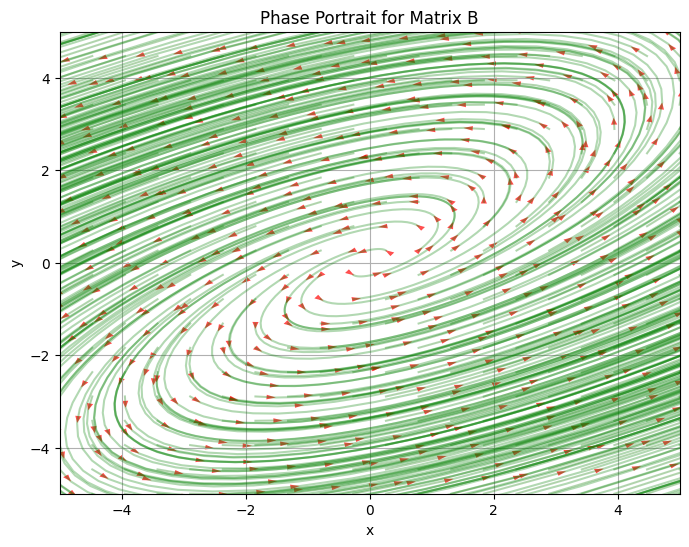

Matrix C Analysis:
Matrix:
[[-3 -2]
 [-1 -3]]
Trace: -6, Determinant: 7.000000000000001
Stable Node



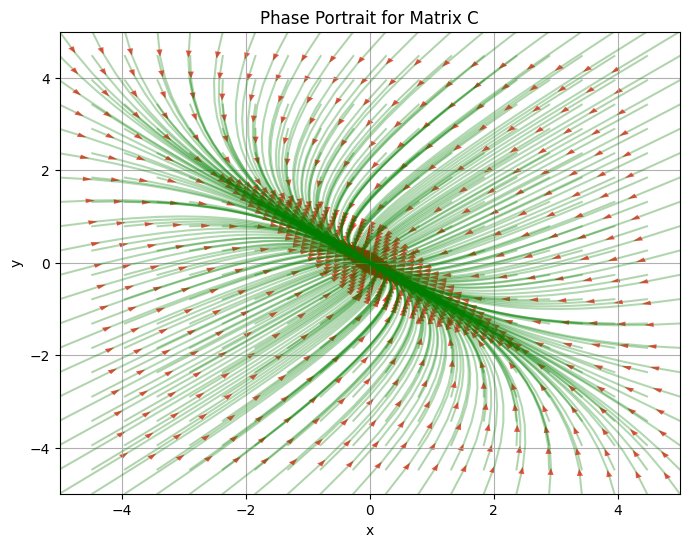

Matrix D Analysis:
Matrix:
[[2 0]
 [0 2]]
Trace: 4, Determinant: 4.0
Unstable Node



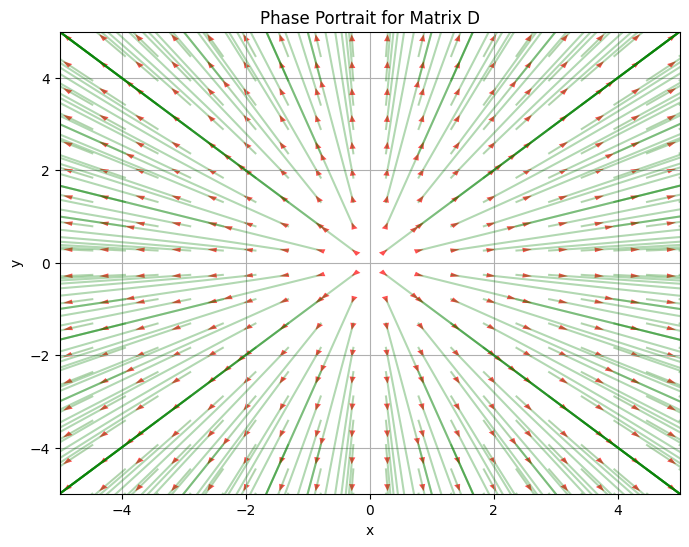

In [6]:


matrices = {
    'A': np.array([[-2, 1],
                  [0, 2]]),
    'B': np.array([[3, -4],
                  [2, -1]]),
    'C': np.array([[-3, -2],
                  [-1, -3]]),
    'D': np.array([[2, 0],
                  [0, 2]])
}

for key, A in matrices.items():
    print(f"Matrix {key} Analysis:")
    classify_matrix(A)
    plot_linear_phase_portrait(A, title=f'Phase Portrait for Matrix {key}', xlim=(-5,5), ylim=(-5,5))